In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from math import log2
from IPython.display import Image
import seaborn as sns
import graphviz
import pydotplus
import time
import os
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\liuth\\Documents\\Python Scripts\\ThinkfulProjects\\Data')

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


---

Exploring and Cleaning the Data

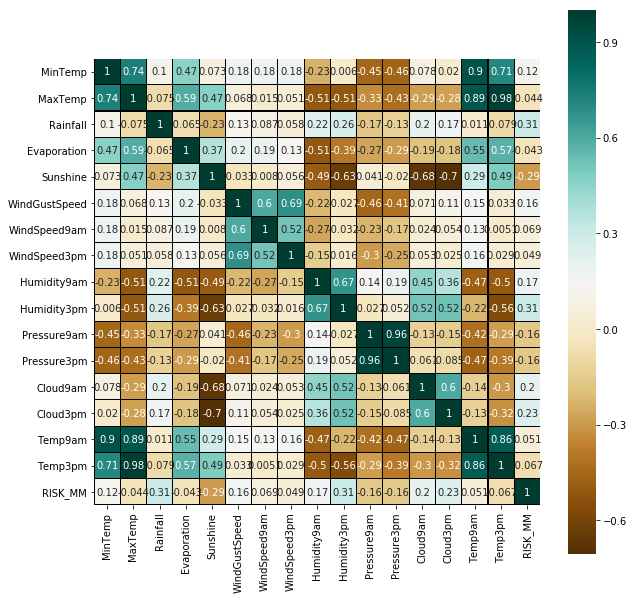

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

In [7]:
#Data Frame Types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [9]:
# Change Rain to binary in order to build model.
df['RainToday'] = df['RainToday'].map(lambda i: 1 if i == True else 0)
df['RainTomorrow'] = df['RainTomorrow'].map(lambda i: 1 if i == True else 0)

#Simplification of the data frame
df = df.drop('Location', axis=1)

#How do i make a loop out of this instead of copying and pasting?
#Try for i in df.columns:
#   df.drop(i, axis=1, name is optional)
df = df.drop('RISK_MM', axis=1)
df = df.drop('MinTemp', axis=1)
df = df.drop('MaxTemp', axis=1)
df = df.drop('Rainfall', axis=1)
df = df.drop('Evaporation', axis=1)
df = df.drop('Sunshine', axis=1)
df = df.drop('WindGustDir', axis=1)
df = df.drop('WindDir9am', axis=1)
df = df.drop('WindDir3pm', axis=1)
df = df.drop('WindSpeed9am', axis=1)
df = df.drop('WindSpeed3pm', axis=1)
df = df.drop('Humidity9am', axis=1)
df = df.drop('Humidity3pm', axis=1)
df = df.drop('Cloud9am', axis=1)
df = df.drop('Cloud3pm', axis=1)
df = df.drop('Temp9am', axis=1)
df = df.drop('Temp3pm', axis=1)

KeyError: "['Location'] not found in axis"

In [10]:
df = df.fillna(0)

---

Decision Tree vs Random Forest

In [29]:
X = df.drop(['RainToday', 'Date', 'RainTomorrow'], axis=1)
Y = df ['RainToday']

In [33]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents
                    , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

dtg = time.time()

In [34]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)

decision_tree.fit(pca_X, Y)
display(cross_val_score(decision_tree, pca_X, Y, cv = 10))
print ("Decision Tree runtime: {}".format(time.time() - dtg))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Decision Tree runtime: 1.1830227375030518


Random Forest

In [35]:
rf_dtg = time.time()
rfc = ensemble.RandomForestClassifier()
display(cross_val_score(rfc, pca_X, Y, cv=10))
print ("Random Forest runtime: {}".format(time.time() - dtg))

C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Random Forest runtime: 50.149420976638794


In [37]:
test = SelectKBest(k=3) 
X1 = X
fit = test.fit(X1, Y)

# Identify features with highest score from a predictive perspective (for all programs) 
names2 = X1.columns
best_features = pd.DataFrame(fit.scores_, index = names2) 
best_features.columns = ['Best Features'] 
best_features.sort_values(by=['Best Features'], ascending=False)

# Take a look at what the best features are.
print(best_features)

selected_features = df[['RainToday', 'RainTomorrow']]

dt_start_time = time.time()
decision_tree = tree.DecisionTreeClassifier()
    
display(cross_val_score(decision_tree, selected_features, Y, cv = 10))
print ("Decision Tree runtime: {}".format(time.time() - dt_start_time))

               Best Features
WindGustSpeed            NaN
Pressure9am              NaN
Pressure3pm              NaN


C:\Users\liuth\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Decision Tree runtime: 0.1735365390777588
